<a href="https://colab.research.google.com/github/aachalb21/AIMLexp/blob/main/EXP2_Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algorithm:
1. Take the data set of 3D MRI brain scans
2. Install itk itkwidgets ipywidgets packages
3. Import numpy, matplotlib and seaborn as well as some new ones for reading nibabel and visualizing
itk, itkwidgets, ipywidgets the data
4. Define the image path and load the data then check the type of the image.
5. Extract the data as a numpy array and print image dimensions such as height, width, depth and
channels.
6. Data visualization by plotting layer of image(Random layer )
7. Interactive data exploration using IPython Widgets and exploring the layers of brain MRI.
8. Explore the data labels.
9. Extract the data as a numpy array and print out the shape of the labels data
10. Visualize a single layer of the labeled data.

In [1]:
!git clone https://github.com/hardik0/AI-for-Medicine-Specialization
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/

Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 23.58 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


In [1]:
!pip install itk itkwidgets ipywidgets #!pip is a shell command to install the given package

In [2]:
!pip install ipywidgets

In [3]:
import numpy as np
import nibabel as nib
import itk, itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### Define the image path and load the data then check the type of the image.

In [6]:
# Define the image path and load the data
image_path = "/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/BraTS-Data/imagesTr/BRATS_001.nii.gz"
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


Extract the data as a numpy array and print image dimensions such as height, width, depth and
channels

In [7]:
# Extract data as numpy ndarray
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [9]:
height, width, depth, channels = image_data.shape
print(f"The image object dimensions: height: {height}, width:{width}, depth:{depth}, channels:{channels}")

The image object dimensions: height: 240, width:240, depth:155, channels:4


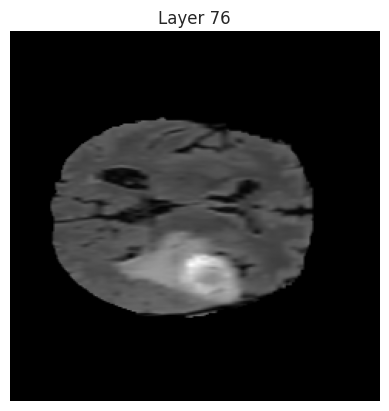

In [16]:
# Select a random layer to display
layer = np.random.randint(0, depth)

# Display the selected layer
plt.imshow(image_data[:, :, layer, 0], cmap='gray') # Assuming the first channel is the relevant one for display
plt.title(f'Layer {layer}')
plt.axis('off')
plt.show()

In [17]:
# Interactive data exploration using IPython Widgets
def explore_image(layer):
    plt.figure(figsize=(6, 6))
    plt.imshow(image_data[:, :, layer, 0], cmap='gray')
    plt.title(f'Layer {layer}')
    plt.axis('off')
    plt.show()

interact(explore_image, layer=IntSlider(min=0, max=depth-1, step=1, description='Layer:'));

interactive(children=(IntSlider(value=0, description='Layer:', max=154), Output()), _dom_classes=('widget-inte…

In [19]:
# Explore the data labels
label_path = "/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/BraTS-Data/labelsTr/BRATS_001.nii.gz"
label_obj = nib.load(label_path)
print(f'Type of the label: {type(label_obj)}')

Type of the label: <class 'nibabel.nifti1.Nifti1Image'>


In [23]:
# Extract the label data as a numpy array
label_data = label_obj.get_fdata()

# Extract and print out the shape of the labels data
height, width, depth = label_data.shape
print(f"Dimensions of labels data array height: {height}, width: {width}, depth: {depth}")
print(f'With the unique values: {np.unique(label_data)}')
print("""Corresponding to the following label categories:
0: for normal
1: for edema
2: for non-enhancing tumor
3: for enhancing tumor""")

Dimensions of labels data array height: 240, width: 240, depth: 155
With the unique values: [0. 1. 2. 3.]
Corresponding to the following label categories:
0: for normal
1: for edema
2: for non-enhancing tumor
3: for enhancing tumor


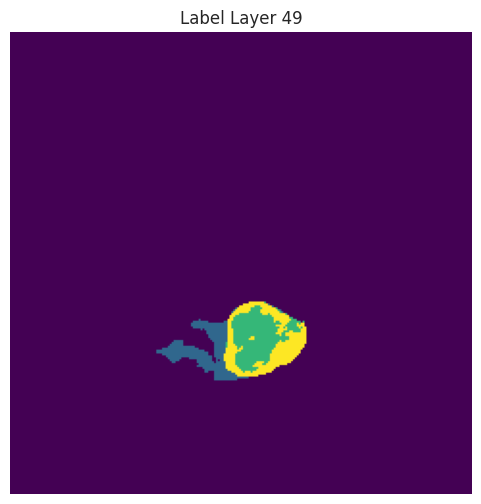

In [30]:
# Visualize a single layer of the labeled data
layer = np.random.randint(0, depth)

plt.figure(figsize=(6, 6))
plt.imshow(label_data[:, :, layer], cmap='viridis') # Using 'viridis' as an example colormap
plt.title(f'Label Layer {layer}')
plt.axis('off')
plt.show()

In [33]:
# Create button values
select_class = ToggleButtons(
    options=['Normal','Edema', 'Non-enhancing tumor', 'Enhancing tumor'],
    description='Select Class:',
    disabled=False,
    button_style='info',
)

# Create layer slider
select_layer = IntSlider(min=0, max=depth-1, description='Select Layer', continuous_update=False)

# Define a dictionary to map class names to label values
classes_dict = {
    'Normal': 0,
    'Edema': 1,
    'Non-enhancing tumor': 2,
    'Enhancing tumor': 3
}

# Define a function for plotting images
def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    img_label = classes_dict[seg_class]
    mask = np.where(label_data[:,:,layer] == img_label, 255, 0)
    plt.figure(figsize=(10,5))
    plt.imshow(mask, cmap='gray')
    plt.axis('off');

# Use the interactive() tool to create the visualization
interactive(plot_image, seg_class=select_class, layer=select_layer)

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('Normal', 'Edem…